In [52]:
!pip install torch torchvision

In [74]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
from sklearn.metrics import confusion_matrix, recall_score, precision_score
import seaborn as sns
from tabulate import tabulate

# Ejercicio 1

In [122]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))])

batch_size = 10

trainset = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform= transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=1)#num_workers permite paralelizar en procesador

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=1)

classes = ('0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9')

In [55]:
len(trainset)

60000

In [123]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis("off")
    plt.show()

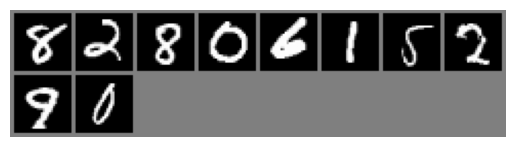

8     2     8     0     6     1     5     2     9     0    
tensor([8, 2, 8, 0, 6, 1, 5, 2, 9, 0])


In [124]:
dataiter = iter(trainloader) #Iterator
#images, labels = dataiter.next()
images, labels = next(dataiter)
#Mostrar imagenes
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))
print(labels)

In [59]:
class Net(nn.Module):
    def __init__(self, i):
        super().__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 10)
        self.i = i

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        if self.i== 0:
          x = F.sigmoid(self.fc1(x))
        if self.i== 1:
          x = F.relu(self.fc1(x))
        if self.i== 2:
          x = F.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

funcion = ["Sigmoide", "ReLU", "Tanh"]

In [ ]:

perdida = np.empty(0)
epochs = 30

for k in range(3):
  print("Entrenando red con la función de activación: ", funcion[k])
  net = Net(k)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(net.parameters(), lr=0.001) #Momento esta en [0,1]
  for epoch in range(epochs):  # Veces que usaremos la base
      running_loss = 0.0
      for i, data in enumerate(trainloader, 0):
          inputs, labels = data

          # Fiamos en cero el gradiente de los parametros
          optimizer.zero_grad()

          # Optimizamos
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # Imprimimos el progrso
          running_loss += loss.item()
          if i % 1000 == 999:    # Cambiar a 20
              print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / (i+1):.3f}')
              #running_loss = 0.0

      perdida = np.append(perdida, running_loss/(len(trainset)/batch_size))

  PATH = 'ej1_' + funcion[k] + '.pth'
  torch.save(net.state_dict(), PATH)
  #net = Net()
  #net.load_state_dict(torch.load(PATH))

print('Finished Training')
perdida = perdida.reshape(3, epochs)

Entrenando red con la función de activación:  Sigmoide
[1,  1000] loss: 2.243
[1,  2000] loss: 2.175
[1,  3000] loss: 2.104
[1,  4000] loss: 2.028
[1,  5000] loss: 1.948
[1,  6000] loss: 1.867
[2,  1000] loss: 1.311
[2,  2000] loss: 1.248
[2,  3000] loss: 1.191
[2,  4000] loss: 1.141
[2,  5000] loss: 1.094
[2,  6000] loss: 1.054
[3,  1000] loss: 0.790
[3,  2000] loss: 0.769
[3,  3000] loss: 0.752
[3,  4000] loss: 0.736
[3,  5000] loss: 0.720
[3,  6000] loss: 0.706
[4,  1000] loss: 0.619
[4,  2000] loss: 0.602
[4,  3000] loss: 0.587
[4,  4000] loss: 0.584
[4,  5000] loss: 0.576
[4,  6000] loss: 0.568
[5,  1000] loss: 0.520
[5,  2000] loss: 0.512
[5,  3000] loss: 0.510
[5,  4000] loss: 0.506
[5,  5000] loss: 0.501
[5,  6000] loss: 0.497
[6,  1000] loss: 0.473
[6,  2000] loss: 0.465
[6,  3000] loss: 0.459
[6,  4000] loss: 0.457
[6,  5000] loss: 0.455
[6,  6000] loss: 0.453
[7,  1000] loss: 0.443
[7,  2000] loss: 0.438
[7,  3000] loss: 0.432
[7,  4000] loss: 0.427
[7,  5000] loss: 0.424
[7

ValueError: ignored

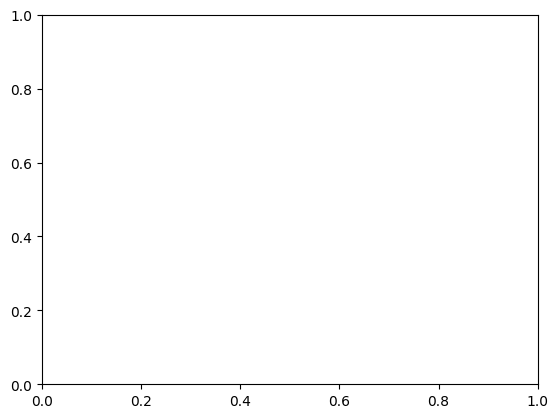

In [51]:
plt.plot(np.arange(epochs),perdida[0])
plt.plot(np.arange(epochs),perdida[1])
plt.plot(np.arange(epochs),perdida[2])
plt.xlabel("Época")
plt.ylabel("Pérdida")
plt.title("Pérdida por épocas")
plt.legend(funcion, loc="upper right")
plt.savefig('Perdida_ej1.png')

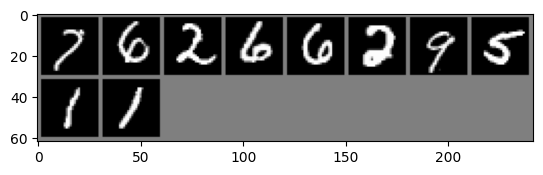

GroundTruth:  7     6     2     6     6     2     9     5     1     1    


In [ ]:
dataiter = iter(trainloader) #Iterator
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
#imshow(torchvision.utils.make_grid(images[0]))
outputs = net(images)
net(images)


tensor([[-1.9521,  0.4023,  2.8956,  3.6391, -4.2236, -3.0923, -5.8266,  5.2289,
          1.1228,  3.3395],
        [-1.9051,  0.6100,  3.0525, -2.3033, -1.6939,  0.9884,  8.0022, -4.4031,
          2.1149, -2.3899],
        [-3.8181,  6.4426, 14.2688,  5.7384, -6.6938, -1.3333,  0.5523, -8.1545,
          3.3007, -7.8458],
        [-1.4264, -3.3305,  3.4712, -1.2574,  2.6236,  0.2338,  9.7814, -4.7085,
         -1.2625, -3.5559],
        [ 3.7558, -6.7518,  1.2361, -3.3732,  0.5350,  0.8719,  7.5610, -3.7827,
          0.0770,  0.6939],
        [ 4.8432, -8.8568, 11.2487,  3.4337, -3.7391, -2.6938,  1.2877, -4.1150,
          4.4053, -4.1464],
        [-4.2149, -3.6523, -2.6788,  0.3487,  1.8818, -0.9160, -4.3805,  3.9628,
          1.2671,  8.3151],
        [ 1.2160, -3.0645, -1.7308, -0.5127, -0.7657,  9.4256,  1.5744, -5.0551,
          3.2532, -3.9949],
        [-4.2694,  7.4161,  1.0312,  1.2725, -3.5751,  0.6317, -0.5564,  0.1381,
          1.6746, -1.4916],
        [-4.5865,  

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ',  ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(batch_size)))

Predicted:  7     6     2     6     6     2     9     5     1     1    


Accuracy of the network on the 10000 test images with activation function Sigmoide :  92 %


       Usando función sigmoide
|   Clases |   Recall |   Precisión |
|----------+----------+-------------|
|        0 | 0.979592 |    0.940255 |
|        1 | 0.977093 |    0.960173 |
|        2 | 0.900194 |    0.912574 |
|        3 | 0.90099  |    0.905473 |
|        4 | 0.931772 |    0.922379 |
|        5 | 0.868834 |    0.895954 |
|        6 | 0.943633 |    0.931959 |
|        7 | 0.917315 |    0.925417 |
|        8 | 0.874743 |    0.897787 |
|        9 | 0.897919 |    0.900596 |


Accuracy of the network on the 10000 test images with activation function ReLU :  96 %


       Usando función relu
|   Clases |   Recall |   Precisión |
|----------+----------+-------------|
|        0 | 0.982653 |    0.972727 |
|        1 | 0.990308 |    0.978242 |
|        2 | 0.96124  |    0.976378 |
|        3 | 0.969307 |    0.959804 |
|        4 | 0.97556  |    0.960883 |
|        5 | 0.955157 |    0.965986 

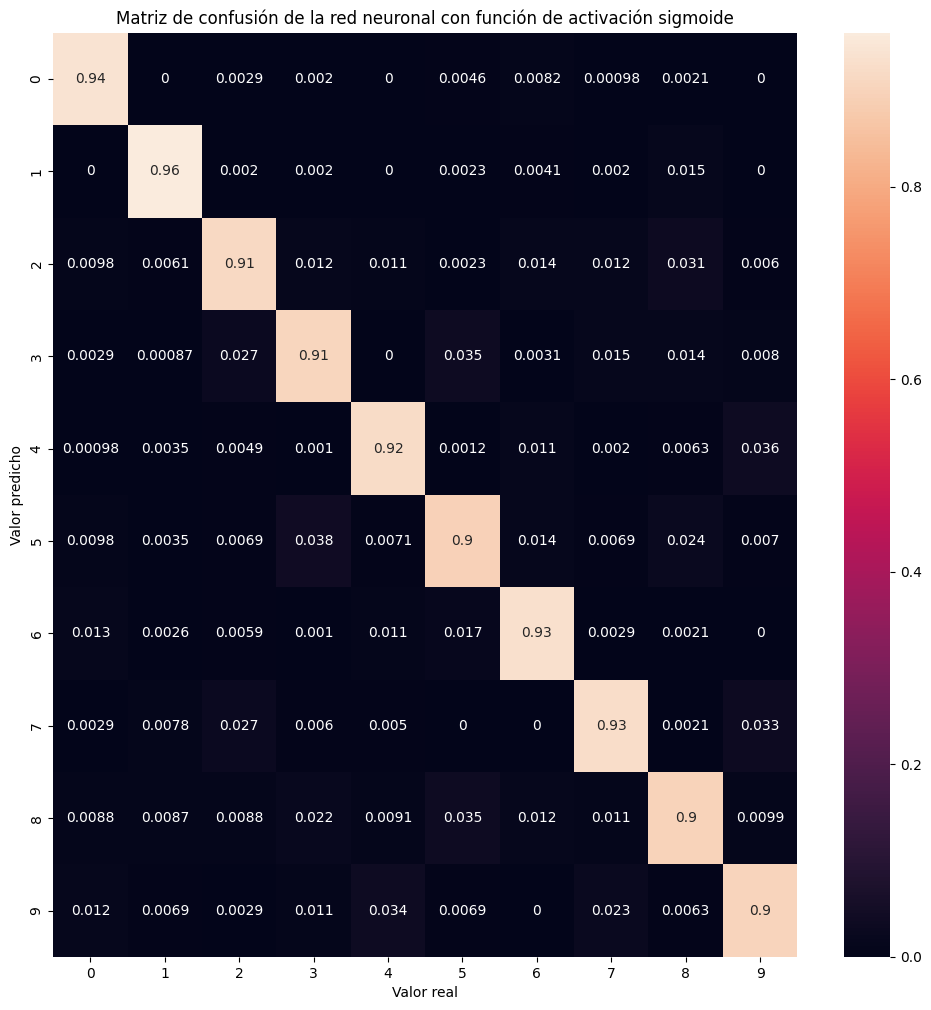

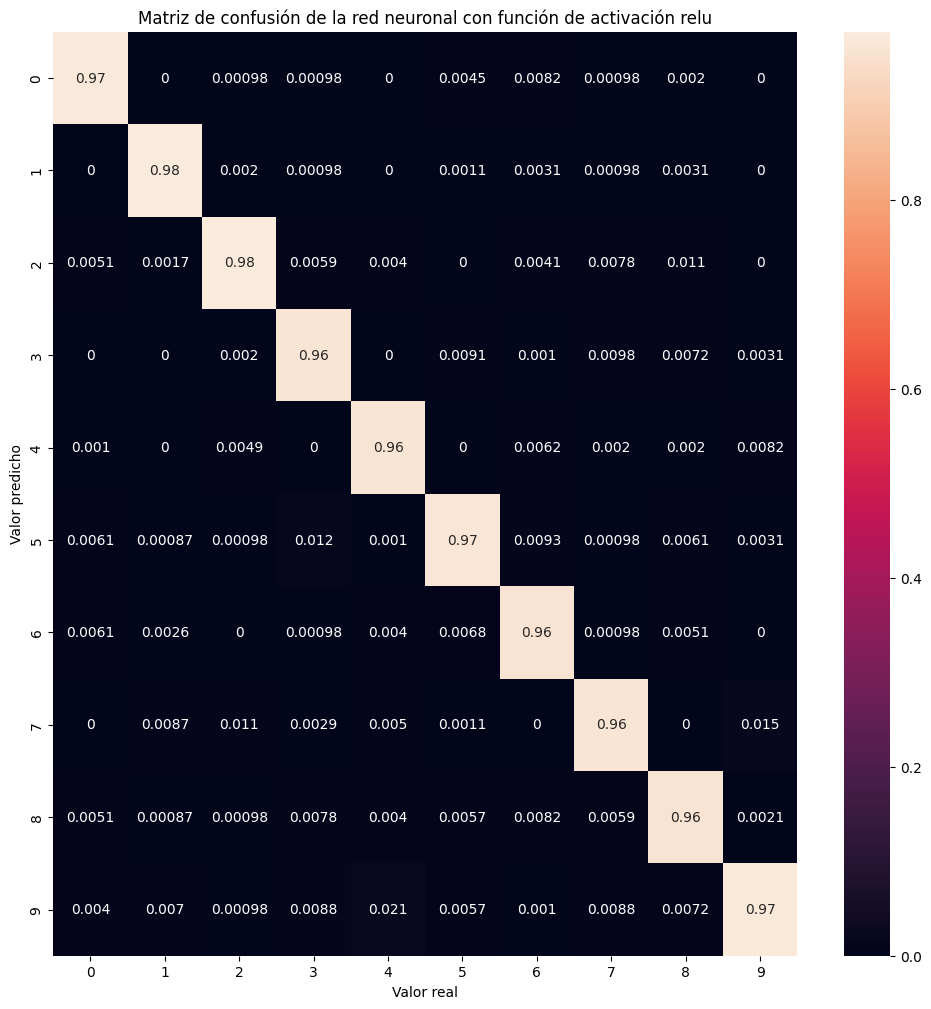

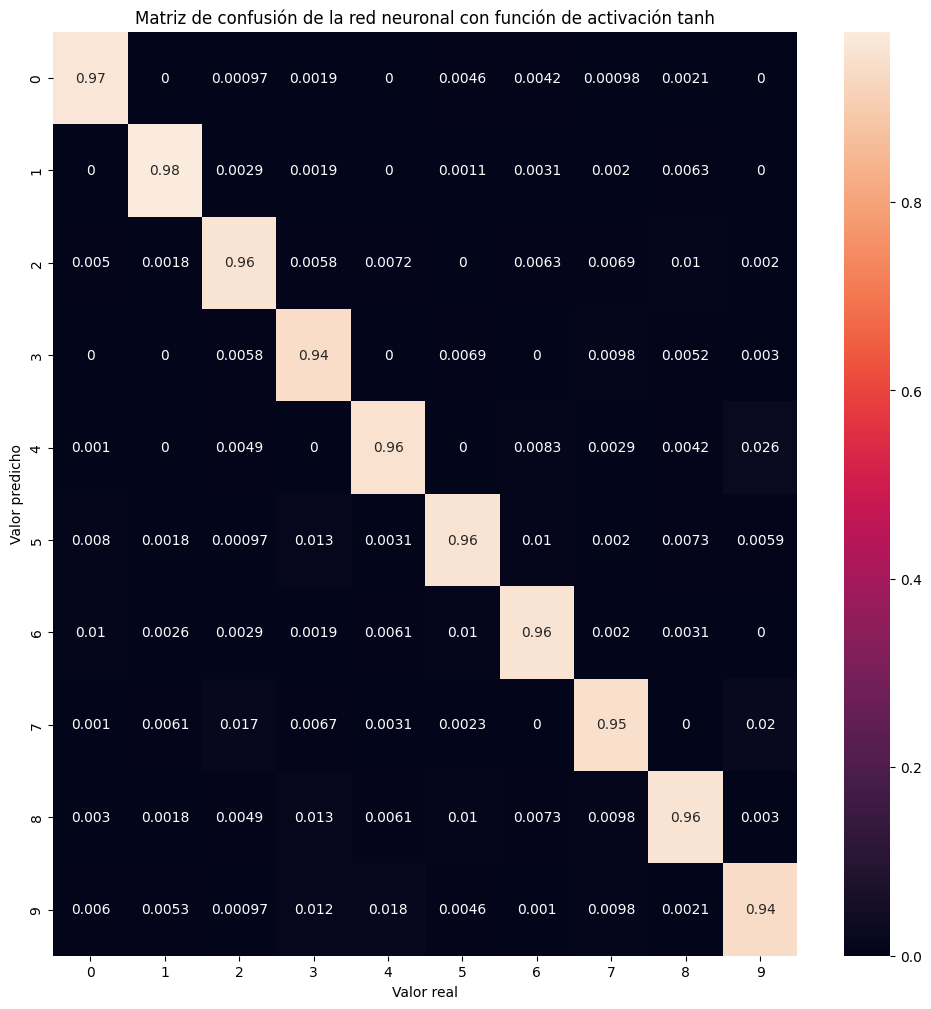

In [114]:
for k in range(3):
  correct = 0
  total = 0

  y_pred = []
  y_true = []

  net = Net(k)
  net.load_state_dict(torch.load('ej1_' + funcion[k] + '.pth'))

  # como no entrenamos no requerimos el gradiente
  with torch.no_grad():
      for data in testloader:
          images, labels = data

          outputs = net(images)

          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

          y_true.extend(np.array(labels))
          y_pred.extend(np.array(predicted))

  print(f'Accuracy of the network on the 10000 test images with activation function {funcion[k]} :  {100 * correct // total} %')

  confusion = confusion_matrix(y_true, y_pred, normalize="pred")
  plt.figure(figsize=(12, 12))
  sns.heatmap(confusion, annot=True)
  plt.title("Matriz de confusión de la red neuronal con función de activación " + funcion[k].lower())
  plt.xlabel("Valor real")
  plt.ylabel("Valor predicho")
  plt.savefig("matriz"+ str(k+1) +"_ej1.png")

  recalls = recall_score(y_true, y_pred,average=None).reshape(10,1)
  precision = precision_score(y_true, y_pred, average=None).reshape(10,1)
  clases = np.array(classes).reshape(10,1)

  tabla = np.hstack((clases, recalls))
  tabla = np.hstack((tabla, precision))
  print("\n")
  print("       Usando función " + funcion[k].lower())
  print(tabulate(tabla, headers=["Clases", "Recall", "Precisión"], tablefmt='orgtbl'))
  print("\n")


In [94]:
u = [np.array(classes).reshape(10,1), recalls.reshape(10,1), precision.reshape(10,1)]

In [90]:
np.array(u[0]).reshape(10,1)

array([['0'],
       ['1'],
       ['2'],
       ['3'],
       ['4'],
       ['5'],
       ['6'],
       ['7'],
       ['8'],
       ['9']], dtype='<U1')

In [99]:
r = np.array(classes).reshape(10,1)
t =  recalls.reshape(10,1)

In [105]:
np.hstack((r,t))

AttributeError: ignored

In [107]:
print(tabulate(np.hstack((r,t))))

-  --------
0  0.985714
1  0.985022
2  0.956395
3  0.970297
4  0.952138
5  0.940583
6  0.960334
7  0.944553
8  0.940452
9  0.940535
-  --------


# Ejercicio 2

In [139]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))])

batch_size = 10

trainset = torchvision.datasets.FashionMNIST(root="./data", train=True, download=True, transform= transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=1)#num_workers permite paralelizar en procesador

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=1)

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

In [140]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis("off")
    plt.show()

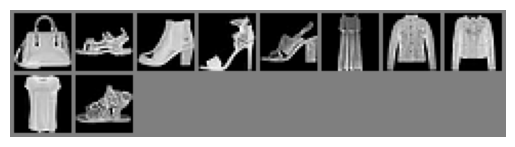

Bag   Sandal Ankle boot Sandal Sandal Dress Coat  Coat  T-shirt/top Sandal
tensor([8, 5, 9, 5, 5, 3, 4, 4, 0, 5])


In [141]:
dataiter = iter(trainloader) #Iterator
#images, labels = dataiter.next()
images, labels = next(dataiter)
#Mostrar imagenes
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))
print(labels)

In [142]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.leaky_relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [ ]:
#Definimos una función que duplique el peso de los calzados: sandal (5), sneakers (7), ankle boot (9)
def my_loss_function(outputs, labels):
  class_weights = torch.where((labels == 5) | (labels == 7) | (labels == 9), torch.tensor(2.0), torch.tensor(1.0))
  loss = nn.CrossEntropyLoss(weight=class_weights)(outputs, labels)

  return loss

In [ ]:
optimizer = optim.Adam(net.parameters(), lr=0.001) #Momento esta en [0,1]

epochs = 30
perdida = np.empty(0)

for epoch in range(epochs):  # Veces que usaremos la base

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # Fiamos en cero el gradiente de los parametros
        optimizer.zero_grad()

        # Optimizamos
        outputs = net(inputs)
        loss = my_loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        # Imprimimos el progrso
        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / (i+1):.3f}')
            #running_loss = 0.0

    perdida = np.append(perdida, running_loss/(len(trainset)/batch_size))

print('Finished Training')

[1,  2000] loss: 0.595
[1,  4000] loss: 0.529
[1,  6000] loss: 0.496
[2,  2000] loss: 0.393
[2,  4000] loss: 0.392
[2,  6000] loss: 0.389
[3,  2000] loss: 0.362
[3,  4000] loss: 0.356
[3,  6000] loss: 0.353
[4,  2000] loss: 0.328
[4,  4000] loss: 0.332
[4,  6000] loss: 0.333
[5,  2000] loss: 0.308
[5,  4000] loss: 0.311
[5,  6000] loss: 0.314
[6,  2000] loss: 0.296
[6,  4000] loss: 0.301
[6,  6000] loss: 0.301
[7,  2000] loss: 0.295
[7,  4000] loss: 0.293
[7,  6000] loss: 0.291
[8,  2000] loss: 0.279
[8,  4000] loss: 0.280
[8,  6000] loss: 0.284
[9,  2000] loss: 0.267
[9,  4000] loss: 0.271
[9,  6000] loss: 0.275
[10,  2000] loss: 0.265
[10,  4000] loss: 0.265
[10,  6000] loss: 0.268
[11,  2000] loss: 0.270
[11,  4000] loss: 0.260
[11,  6000] loss: 0.262
[12,  2000] loss: 0.257
[12,  4000] loss: 0.256
[12,  6000] loss: 0.259
[13,  2000] loss: 0.239
[13,  4000] loss: 0.244
[13,  6000] loss: 0.252
[14,  2000] loss: 0.242
[14,  4000] loss: 0.247
[14,  6000] loss: 0.248
[15,  2000] loss: 0

In [134]:
PATH = 'ej2.pth'
torch.save(net.state_dict(), PATH)

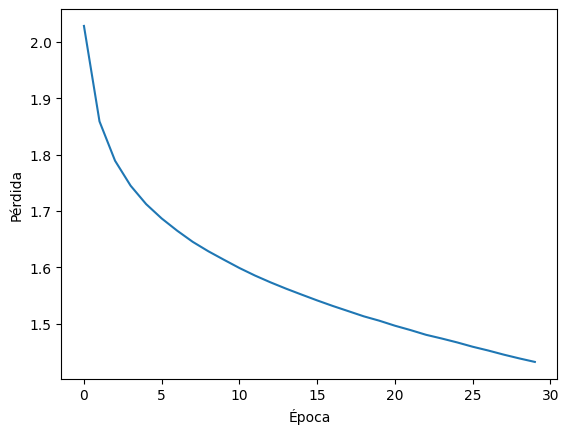

In [126]:
plt.plot(np.arange(epochs),perdida)
plt.xlabel("Época")
plt.ylabel("Pérdida")
#plt.legend(funcion, loc="upper right")
plt.savefig('Perdida_ej2.png')

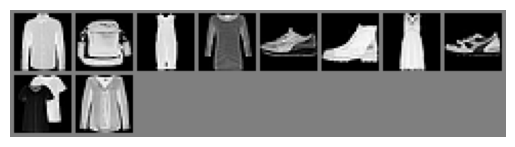

GroundTruth:  Shirt Bag   Trouser T-shirt/top Sneaker Ankle boot Dress Sneaker T-shirt/top Shirt


In [132]:
dataiter = iter(trainloader) #Iterator
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [136]:
outputs = net(images)

In [137]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ',  ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(10)))

Predicted:  T-shirt/top T-shirt/top T-shirt/top T-shirt/top T-shirt/top T-shirt/top T-shirt/top T-shirt/top T-shirt/top T-shirt/top


Accuracy of the network on the 10000 test images: 87 %


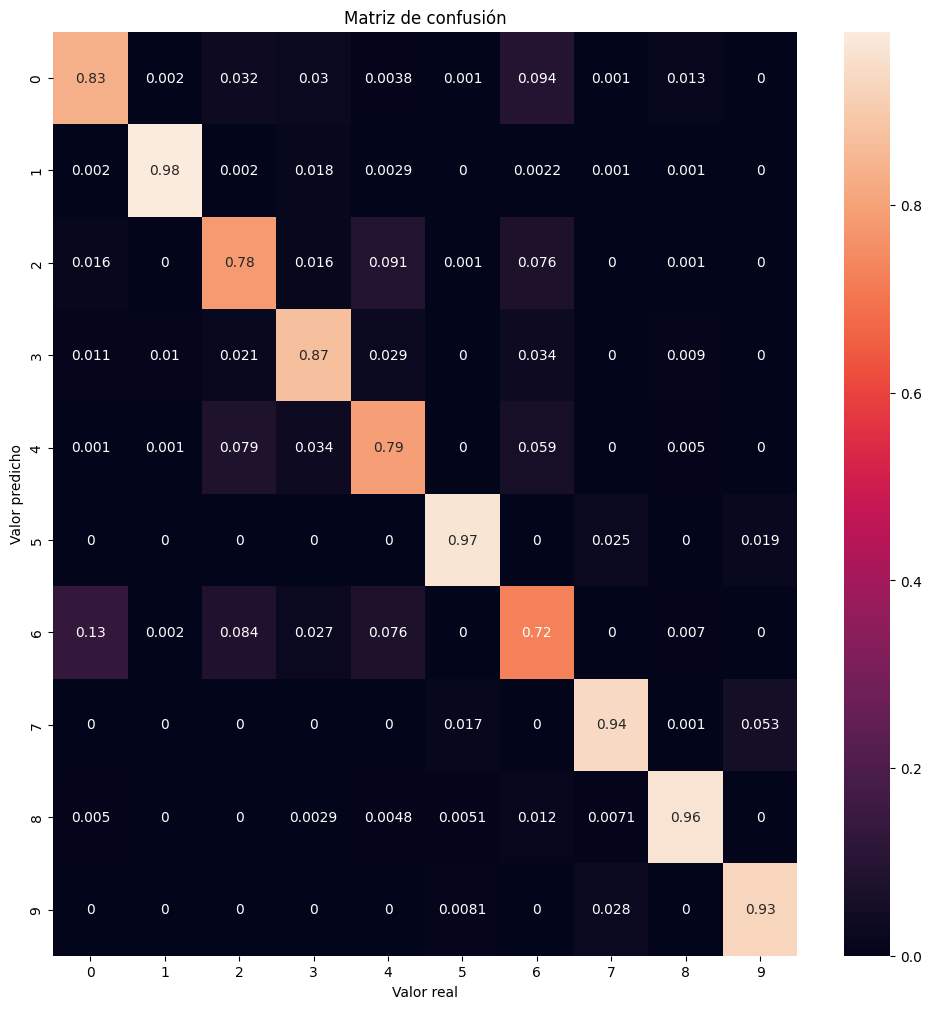

In [145]:
correct = 0
total = 0

y_true = []
y_pred = []

net = Net()
net.load_state_dict(torch.load('ej2.pth'))
# como no entrenamos no requerimos el gradiente
with torch.no_grad():
    for data in testloader:
        images, labels = data

        outputs = net(images)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        y_true.extend(np.array(labels))
        y_pred.extend(np.array(predicted))

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

confusion = confusion_matrix(y_true, y_pred, normalize="pred")
plt.figure(figsize=(12, 12))
sns.heatmap(confusion, annot=True)
plt.title("Matriz de confusión")
plt.xlabel("Valor real")
plt.ylabel("Valor predicho")
plt.savefig("matriz_ej2.png")

In [ ]:
y_true.extend(np.array(labels))
          y_pred.extend(np.array(predicted))

  print(f'Accuracy of the network on the 10000 test images with activation function {funcion[k]} :  {100 * correct // total} %')

  confusion = confusion_matrix(y_true, y_pred, normalize="pred")
  plt.figure(figsize=(12, 12))
  sns.heatmap(confusion, annot=True)
  plt.title("Matriz de confusión de la red neuronal con función de activación " + funcion[k].lower())
  plt.xlabel("Valor real")
  plt.ylabel("Valor predicho")
  plt.savefig("matriz"+ str(k+1) +"_ej1.png")

# Ejercicio 3

In [147]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])#Tambien existe transforms.nn.Sequential

batch_size = 64

#Usaremos una base de datos de ejemplo de pytorch
#Es importante notar que se divide en dos grupos, entrenamiento y prueba
#Vayamos a las notas
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=1)#num_workers permite paralelizar en procesador

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=1)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [38]:
len(trainset)

50000

In [146]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis("off")
    plt.show()

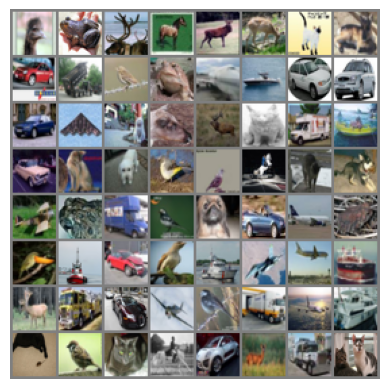

bird  frog  deer  horse deer  deer  cat   deer  car   truck bird  frog  plane ship  car   car   car   plane cat   deer  deer  cat   truck ship  car   cat   dog   bird  bird  horse cat   dog   plane frog  truck bird  dog   car   plane frog  bird  ship  car   bird  ship  plane plane ship  deer  truck car   plane bird  truck plane ship  cat   bird  cat   horse car   deer  truck cat  
tensor([2, 6, 4, 7, 4, 4, 3, 4, 1, 9, 2, 6, 0, 8, 1, 1, 1, 0, 3, 4, 4, 3, 9, 8,
        1, 3, 5, 2, 2, 7, 3, 5, 0, 6, 9, 2, 5, 1, 0, 6, 2, 8, 1, 2, 8, 0, 0, 8,
        4, 9, 1, 0, 2, 9, 0, 8, 3, 2, 3, 7, 1, 4, 9, 3])


In [148]:
dataiter = iter(trainloader) #Iterator
#images, labels = dataiter.next()
images, labels = next(dataiter)
#Mostrar imagenes
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))
print(labels)

## Red 1

In [149]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 12000)
        self.fc2 = nn.Linear(12000, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001) #Momento esta en [0,1]

epochs = 30
perdida = np.empty(0)
precision = np.empty(0)
tiempo = np.empty(0)

inicio = time.time()
for epoch in range(epochs):  # Veces que usaremos la base
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # Fiamos en cero el gradiente de los parametros
        optimizer.zero_grad()

        # Optimizamos
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        #Calculamos las predicciones
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Imprimimos el progrso
        running_loss += loss.item()
        if i % 100 == 99:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / (i+1):.3f}')
            #running_loss = 0.0

    fin = time.time()
    tiempo = np.append(tiempo, fin-inicio)
    perdida = np.append(perdida, running_loss/(len(trainset)/batch_size))
    precision = np.append(precision, 100 * correct / total)

print('Finished Training')

[1,   100] loss: 2.213
[1,   200] loss: 2.163
[1,   300] loss: 2.127
[1,   400] loss: 2.099
[1,   500] loss: 2.076
[1,   600] loss: 2.057
[1,   700] loss: 2.039
[2,   100] loss: 1.905
[2,   200] loss: 1.900
[2,   300] loss: 1.890
[2,   400] loss: 1.882
[2,   500] loss: 1.872
[2,   600] loss: 1.868
[2,   700] loss: 1.863
[3,   100] loss: 1.812
[3,   200] loss: 1.800
[3,   300] loss: 1.801
[3,   400] loss: 1.798
[3,   500] loss: 1.796
[3,   600] loss: 1.792
[3,   700] loss: 1.789
[4,   100] loss: 1.762
[4,   200] loss: 1.759
[4,   300] loss: 1.760
[4,   400] loss: 1.752
[4,   500] loss: 1.749
[4,   600] loss: 1.748
[4,   700] loss: 1.745
[5,   100] loss: 1.721
[5,   200] loss: 1.712
[5,   300] loss: 1.709
[5,   400] loss: 1.708
[5,   500] loss: 1.711
[5,   600] loss: 1.711
[5,   700] loss: 1.711
[6,   100] loss: 1.687
[6,   200] loss: 1.694
[6,   300] loss: 1.690
[6,   400] loss: 1.692
[6,   500] loss: 1.690
[6,   600] loss: 1.689
[6,   700] loss: 1.686
[7,   100] loss: 1.661
[7,   200] 

In [ ]:
PATH = 'ej3_red1.pth'
torch.save(net.state_dict(), PATH)

## LeNet 5

In [150]:
class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = LeNet()

In [44]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001) #Momento esta en [0,1]

epochs = 30
perdida2 = np.empty(0)
precision2 = np.empty(0)
tiempo2 = np.empty(0)

inicio = time.time()
for epoch in range(epochs):  # Veces que usaremos la base
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # Fiamos en cero el gradiente de los parametros
        optimizer.zero_grad()

        # Optimizamos
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        #Calculamos las predicciones
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Imprimimos el progrso
        running_loss += loss.item()
        if i % 100 == 99:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / (i+1):.3f}')
            #running_loss = 0.0

    fin = time.time()
    tiempo2 = np.append(tiempo2, fin-inicio)
    perdida2 = np.append(perdida2, running_loss/(len(trainset)/batch_size))
    precision2 = np.append(precision2, 100 * correct / total)

print('Finished Training')

[1,   100] loss: 2.296
[1,   200] loss: 2.295
[1,   300] loss: 2.296
[1,   400] loss: 2.295
[1,   500] loss: 2.295
[1,   600] loss: 2.295
[1,   700] loss: 2.295
[2,   100] loss: 2.293
[2,   200] loss: 2.292
[2,   300] loss: 2.292
[2,   400] loss: 2.291
[2,   500] loss: 2.291
[2,   600] loss: 2.291
[2,   700] loss: 2.290
[3,   100] loss: 2.287
[3,   200] loss: 2.287
[3,   300] loss: 2.286
[3,   400] loss: 2.285
[3,   500] loss: 2.285
[3,   600] loss: 2.285
[3,   700] loss: 2.284
[4,   100] loss: 2.279
[4,   200] loss: 2.279
[4,   300] loss: 2.277
[4,   400] loss: 2.277
[4,   500] loss: 2.276
[4,   600] loss: 2.275
[4,   700] loss: 2.274
[5,   100] loss: 2.265
[5,   200] loss: 2.264
[5,   300] loss: 2.263
[5,   400] loss: 2.262
[5,   500] loss: 2.261
[5,   600] loss: 2.260
[5,   700] loss: 2.259
[6,   100] loss: 2.244
[6,   200] loss: 2.241
[6,   300] loss: 2.240
[6,   400] loss: 2.238
[6,   500] loss: 2.237
[6,   600] loss: 2.235
[6,   700] loss: 2.234
[7,   100] loss: 2.214
[7,   200] 

In [50]:
PATH = 'ej3_lenet1.pth'
torch.save(net.state_dict(), PATH)

## Gráficas

In [45]:
minutos = tiempo/60
minutos2 = tiempo2/60

In [156]:
minutos

array([  4.4867451 ,   9.25433457,  13.76237459,  18.54402222,
        23.12951955,  27.90063665,  32.50054364,  37.17855349,
        41.75834311,  46.39621572,  51.0036132 ,  55.62004317,
        60.23852061,  64.88806675,  69.49336837,  74.12865054,
        78.78116151,  83.66772687,  88.34214319,  93.0695046 ,
        97.57592443, 102.31139686, 106.80987686, 111.5362295 ,
       116.01818481, 120.73207682, 125.21438377, 129.73590838,
       134.44202136, 138.96748493])

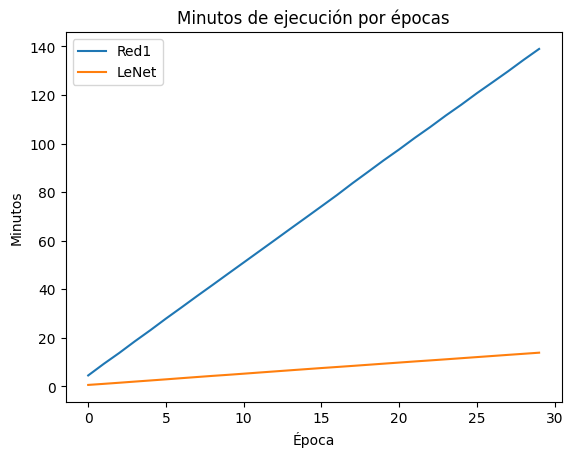

In [46]:
plt.plot(np.arange(len(minutos)), minutos)
plt.plot(np.arange(len(minutos2)), minutos2)
plt.legend(["Red1", "LeNet"])
plt.xlabel("Época")
plt.ylabel("Minutos")
plt.title("Minutos de ejecución por épocas")
plt.savefig('Tiempo_ej3.png')

In [47]:
plt.plot(np.arange(len(perdida)), perdida)
plt.plot(np.arange(len(perdida2)), perdida2)
plt.legend(["Red1", "LeNet"], loc="upper right")
plt.xlabel("Época")
plt.ylabel("Pérdida")
plt.title("Pérdida por épocas")
plt.savefig('Perdida_ej3.png')

In [48]:
plt.plot(np.arange(len(precision)), precision)
plt.plot(np.arange(len(precision2)), precision2)
plt.legend(["Red1", "LeNet"])
plt.xlabel("Época")
plt.ylabel("Precisión")
plt.title("Precisión por épocas")
plt.savefig('Precision_ej3.png')

Accuracy of the network on the 10000 test images: 49 %


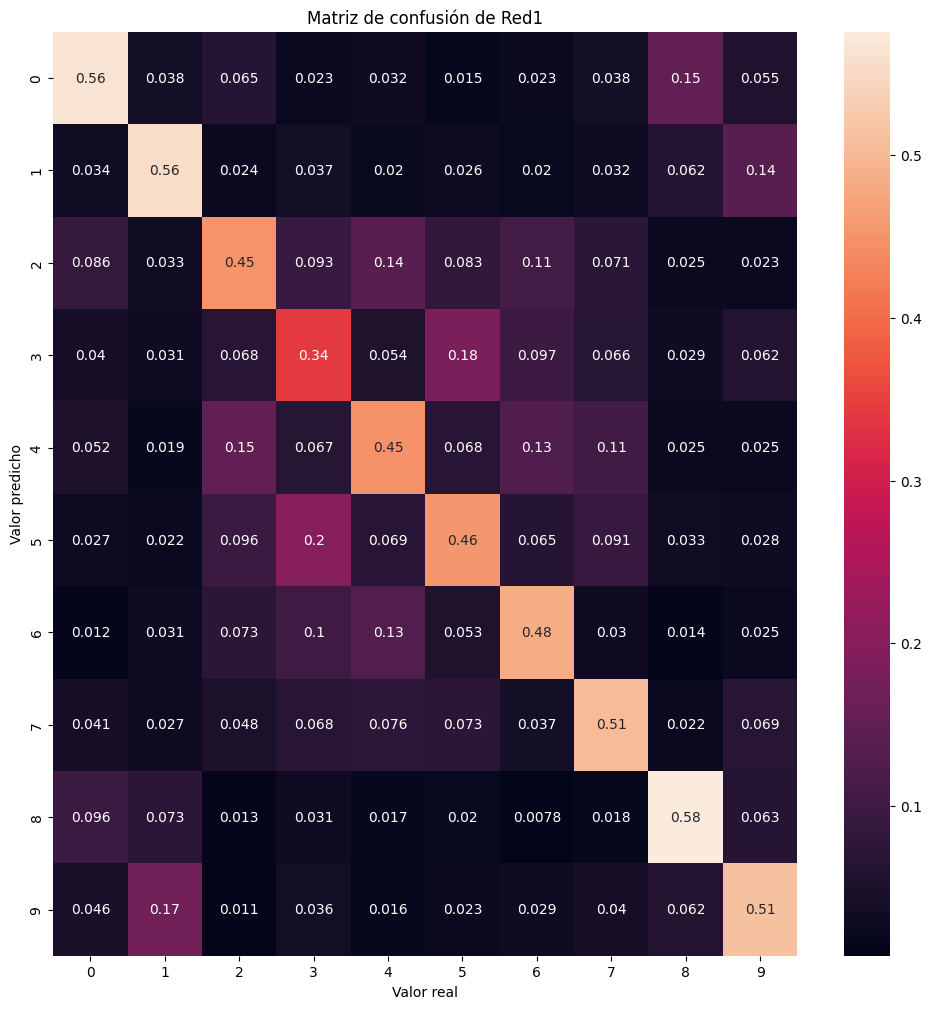

In [157]:
correct = 0
total = 0

y_true = []
y_pred = []

net = Net()
net.load_state_dict(torch.load('ej3_red1.pth'))
# como no entrenamos no requerimos el gradiente
with torch.no_grad():
    for data in testloader:
        images, labels = data

        outputs = net(images)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        y_true.extend(np.array(labels))
        y_pred.extend(np.array(predicted))

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

confusion = confusion_matrix(y_true, y_pred, normalize="pred")
plt.figure(figsize=(12, 12))
sns.heatmap(confusion, annot=True)
plt.title("Matriz de confusión de Red1")
plt.xlabel("Valor real")
plt.ylabel("Valor predicho")
plt.savefig("matriz1_ej3.png")

In [158]:
correct = 0
total = 0

y_true = []
y_pred = []

net = LeNet()
net.load_state_dict(torch.load('ej3_lenet1.pth'))
# como no entrenamos no requerimos el gradiente
with torch.no_grad():
    for data in testloader:
        images, labels = data

        outputs = net(images)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        y_true.extend(np.array(labels))
        y_pred.extend(np.array(predicted))

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

confusion = confusion_matrix(y_true, y_pred, normalize="pred")
plt.figure(figsize=(12, 12))
sns.heatmap(confusion, annot=True)
plt.title("Matriz de confusión de LeNet")
plt.xlabel("Valor real")
plt.ylabel("Valor predicho")
plt.savefig("matriz2_ej3.png")

Accuracy of the network on the 10000 test images: 39 %
